In [1]:
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
import cmath
n_rays=64*64
import codecs
raytrace_dir='/Users/polaris/Pol_aberrations/SCoOB/Raytrace_GC/'
import chardet
from matplotlib.patches import Circle
import astropy.io.fits as fits
import warnings
warnings.filterwarnings('ignore')
import time
import polab as pol
import genfig as gen

In [2]:
with open(raytrace_dir+'ray_0.txt', 'rb') as f:
    enc = chardet.detect(f.read()) 

In [3]:
file_dir='/Users/polaris/Pol_aberrations/SCoOB/'
ref_file=pd.read_excel(file_dir+'refractive_indices_info.xlsx',header=1)
print(ref_file)

     Band  Wavelength     n_Al     k_Al   n_Al2    k_Al2   n_Sio     k_Sio  \
0   UV200       0.200  0.11945   2.2653  0.2400   1.9760     NaN       NaN   
1     UVC       0.250  0.18460   2.9293  0.2170   2.4330  1.8800  0.656320   
2   UV300       0.300  0.26418   3.5787  0.2630   3.0030  2.1610  0.430000   
3       U       0.364  0.39732   4.3875  0.3494   3.7118  2.2478  0.213500   
4   UV400       0.400  0.48787   4.8355  0.4200   4.1080     NaN       NaN   
5      B        0.442  0.60555   5.3577  0.5126   4.5574  2.0607  0.072885   
6       g       0.475  0.72122   5.7556  0.5980   4.9080  2.0187  0.047280   
7       V       0.540  0.97274   6.5119  0.7960   5.5770  1.9815  0.008000   
8     R_l       0.630  1.43030   7.5081  1.1530   6.4570     NaN       NaN   
9       R       0.647  1.53890   7.6818  1.2415   6.6140  1.9526  0.000800   
10      I       0.789  2.72330   8.4171  2.1921   7.3410  1.9317  0.000520   
11      z       0.866  2.44990   8.1439  1.9564   7.1214  1.9200

In [4]:
#Add coating information here 
# follow the convention of n-ik for single and 2 layer coating

bandno=input('Input the index of band for the analysis:')

band=ref_file['Band']
lam=ref_file['Wavelength']
fil=band[int(bandno)]
wav=lam[float(bandno)]

df1=0.189
n_m1=ref_file['n_Al']
k_m1=ref_file['k_Al']
n_p1=ref_file['n_MgF2']
k_p1=ref_file['k_MgF2']

nb1=n_m1[float(bandno)]-1j*k_m1[float(bandno)]
nf1=n_p1[float(bandno)]-1j*k_p1[float(bandno)]


df2=0.05
n_m2=ref_file['n_Al2']
k_m2=ref_file['k_Al2']
ni=1
nb2=n_m2[float(bandno)]-1j*k_m2[float(bandno)]

Input the index of band for the analysis: 8


In [5]:
start = time.time()
m3_raydata=[];fsm_raydata=[];oap1_raydata=[];oap2_raydata=[];dm_raydata=[];oap3_raydata=[];
ff1_raydata=[];oap3s_raydata=[];ff2_raydata=[];oap2s_raydata=[];oap1s_raydata=[];ff0_raydata=[];
for i in range(0,n_rays):
    ray_data=pd.read_csv(raytrace_dir+"ray_"+str(i)+".txt",encoding = enc['encoding'],skiprows=20,nrows=70,delim_whitespace=True,names=["Surface","X-cor","Y-cor","Z-cor","ref-x","ref-y","ref-z","nor-x","nor-y","nor-z","Inc-ang","Pathlength","Surface-name","Comment1","Comment2","Comment3","Ray-Stat","Comment4"])
    
    m3_raydata.append(ray_data.iloc[6])
    fsm_raydata.append(ray_data.iloc[9])
    oap1_raydata.append(ray_data.iloc[15])
    oap2_raydata.append(ray_data.iloc[22])
    dm_raydata.append(ray_data.iloc[26])
    oap3_raydata.append(ray_data.iloc[33])
    ff1_raydata.append(ray_data.iloc[39])
    oap3s_raydata.append(ray_data.iloc[43])
    ff2_raydata.append(ray_data.iloc[48])
    oap2s_raydata.append(ray_data.iloc[57])
    oap1s_raydata.append(ray_data.iloc[63])
    ff0_raydata.append(ray_data.iloc[69])
end = time.time()
print(end - start) # time in seconds

5.162306785583496


In [7]:
jones_pupils_dir=file_dir+'jones_pupils/'

The first - M3 mirror 

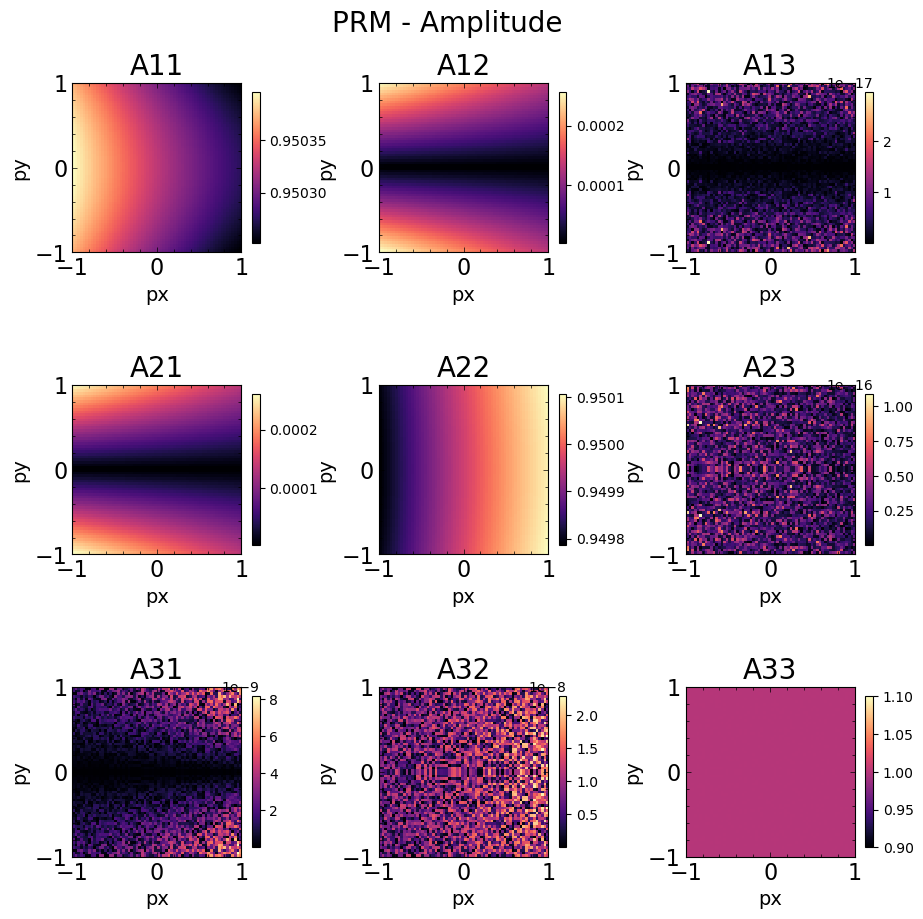

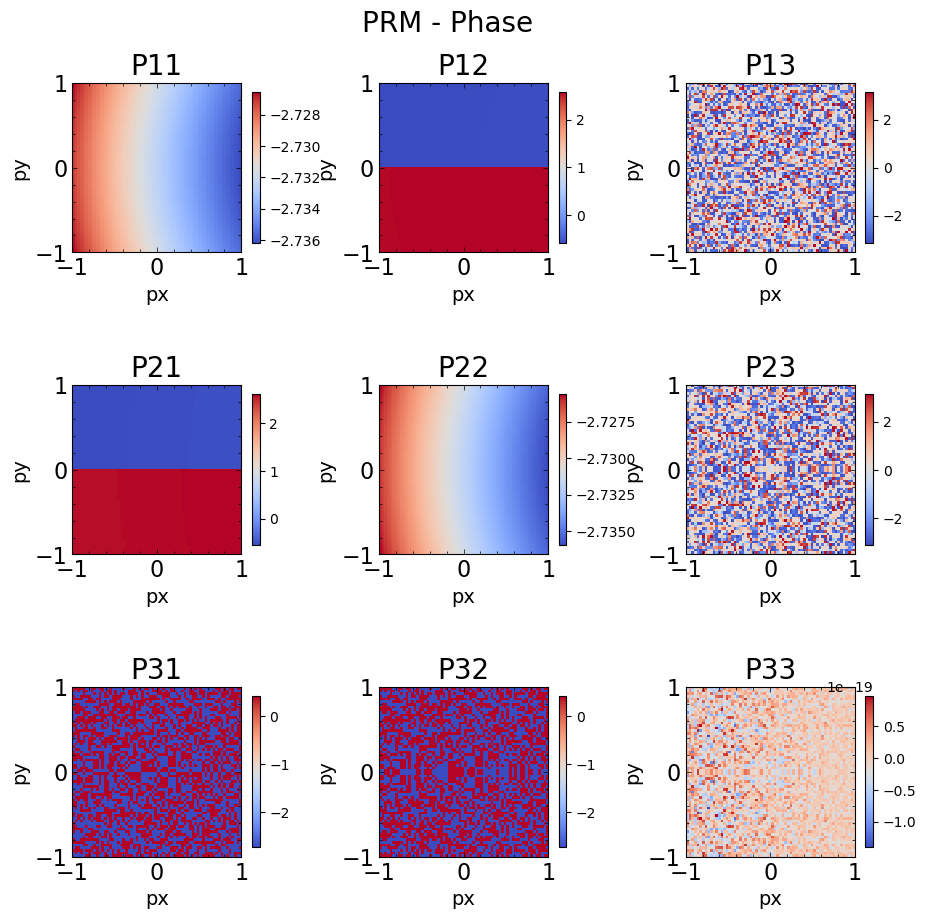

In [9]:
a_loc=np.array([0,0,1])
xin=np.array([0,1,0])
xout=np.array([0,1,0])

prt=pol.calc_prt(sur_list=m3_raydata,n_rays=n_rays,a_loc=a_loc,xin=xin,xout=xout,n_layer=2,nb=nb1,ni=ni,nf=nf1,df=df1,wav=wav)
jones=pol.calc_jones(prt[2],prt[3],prt[4])
gen.plot_prm(jones,prt[1],mask='no')
gen.save_jones(jones,prt[1],jones_pupils_dir,fil,'m3')

FSM

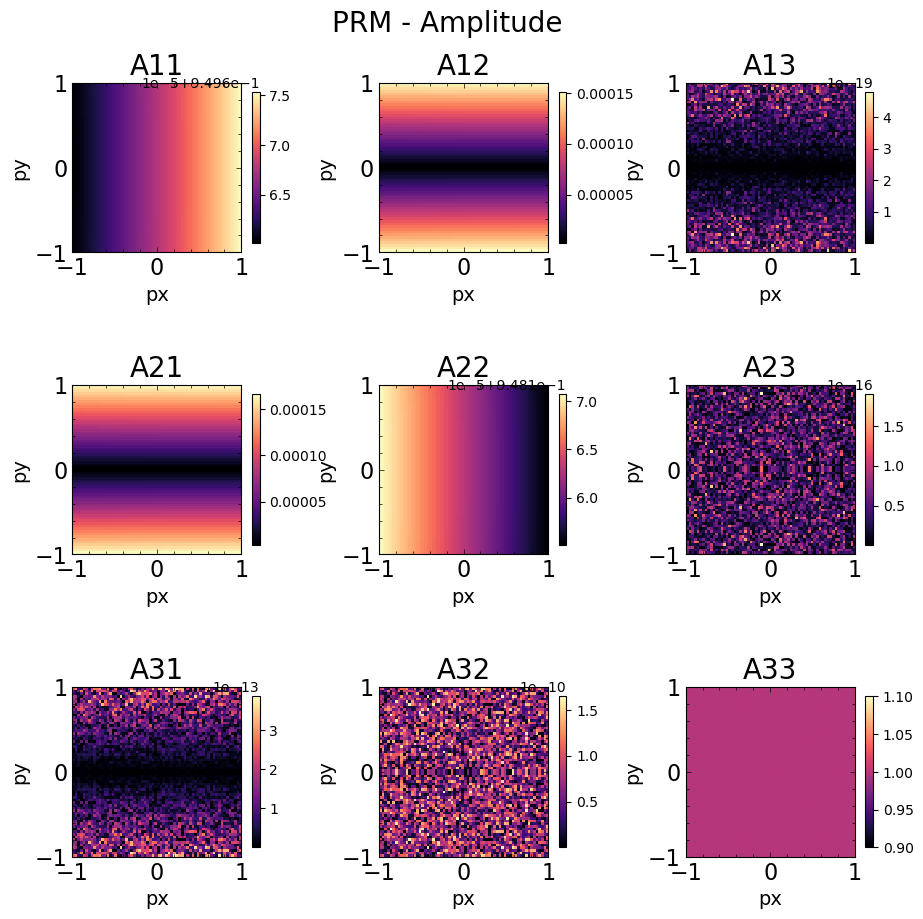

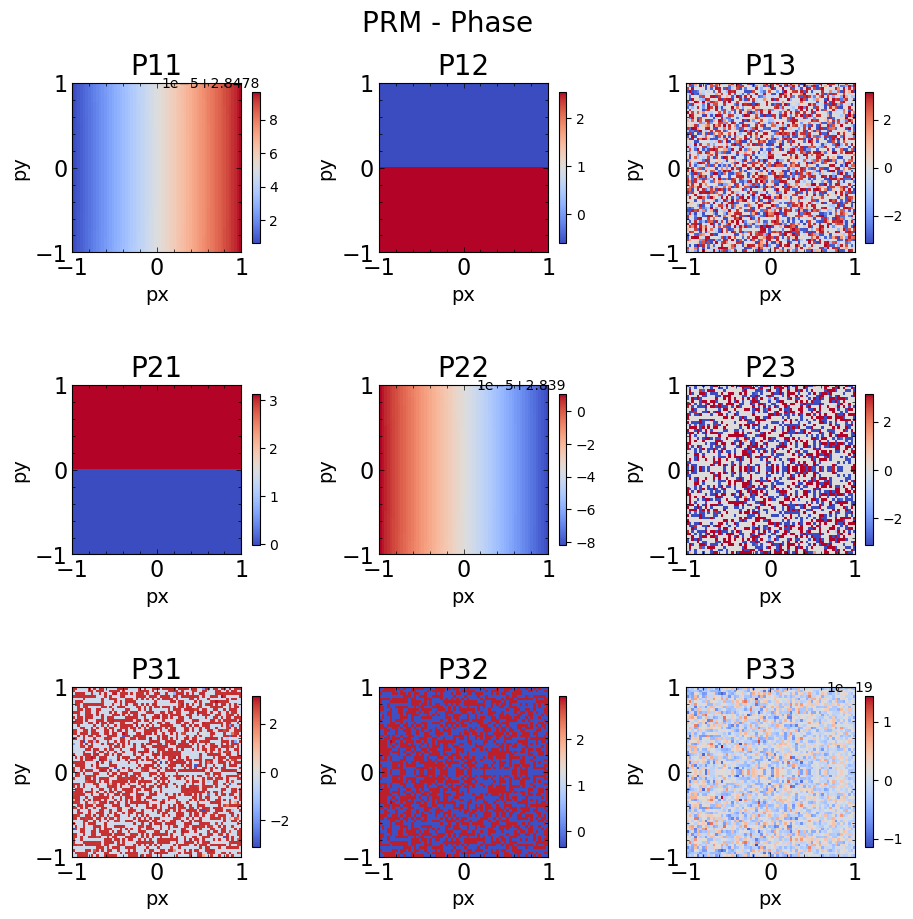

In [10]:
a_loc=np.array([0,0,1])
xin=np.array([0,1,0])
xout=np.array([0,1,0])


prt=pol.calc_prt(sur_list=fsm_raydata,n_rays=n_rays,a_loc=a_loc,xin=xin,xout=xout,n_layer=1,nb=nb2,nf=None,df=None,wav=wav)
jones=pol.calc_jones(prt[2],prt[3],prt[4])
gen.plot_prm(jones,prt[1])
gen.save_jones(jones,prt[1],jones_pupils_dir,fil,'fsm')

OAP1

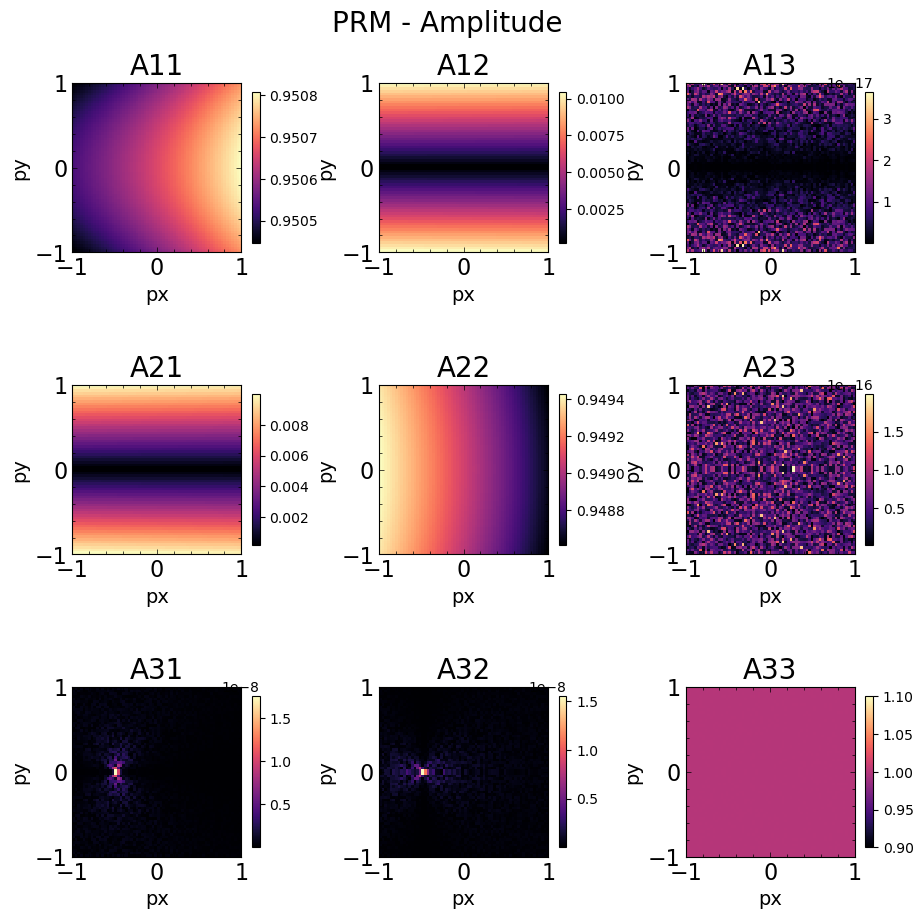

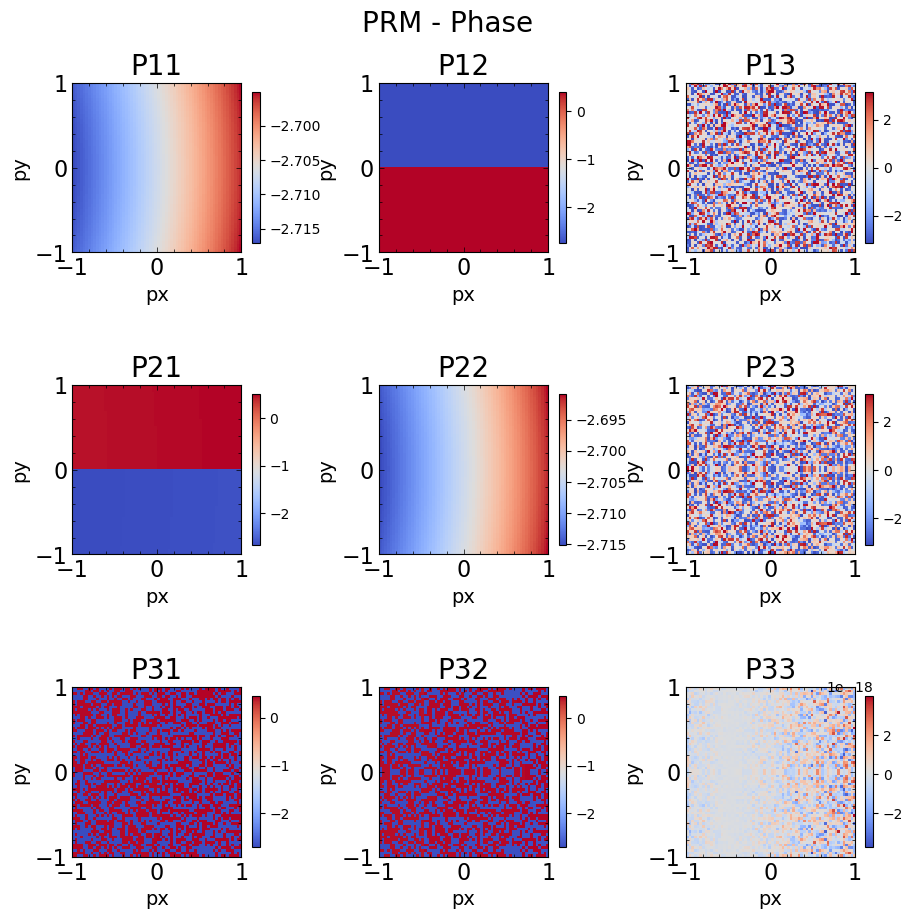

In [11]:
a_loc=np.array([0,0,1])
xin=np.array([0,1,0])
xout=np.array([0,1,0])

prt=pol.calc_prt(sur_list=oap1_raydata,n_rays=n_rays,a_loc=a_loc,xin=xin,xout=xout,n_layer=2,nb=nb1,nf=nf1,df=df1,wav=wav)
jones=pol.calc_jones(prt[2],prt[3],prt[4])
gen.plot_prm(jones,prt[1])
gen.save_jones(jones,prt[1],jones_pupils_dir,fil,'oap1')

OAP2

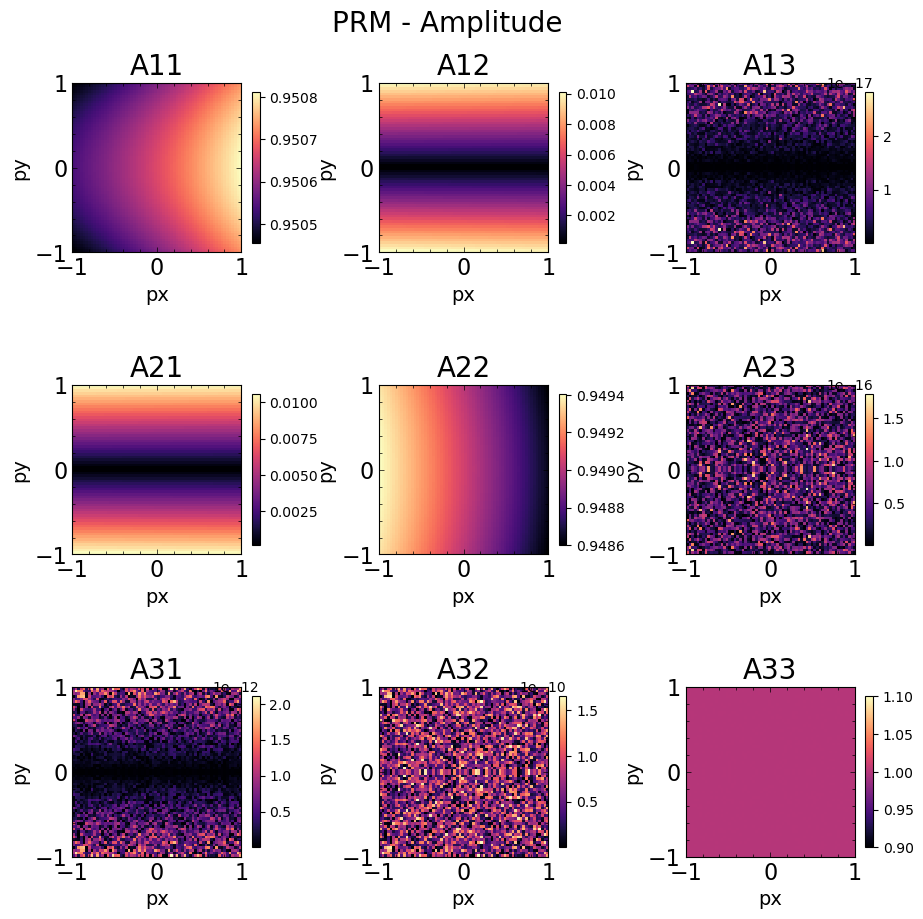

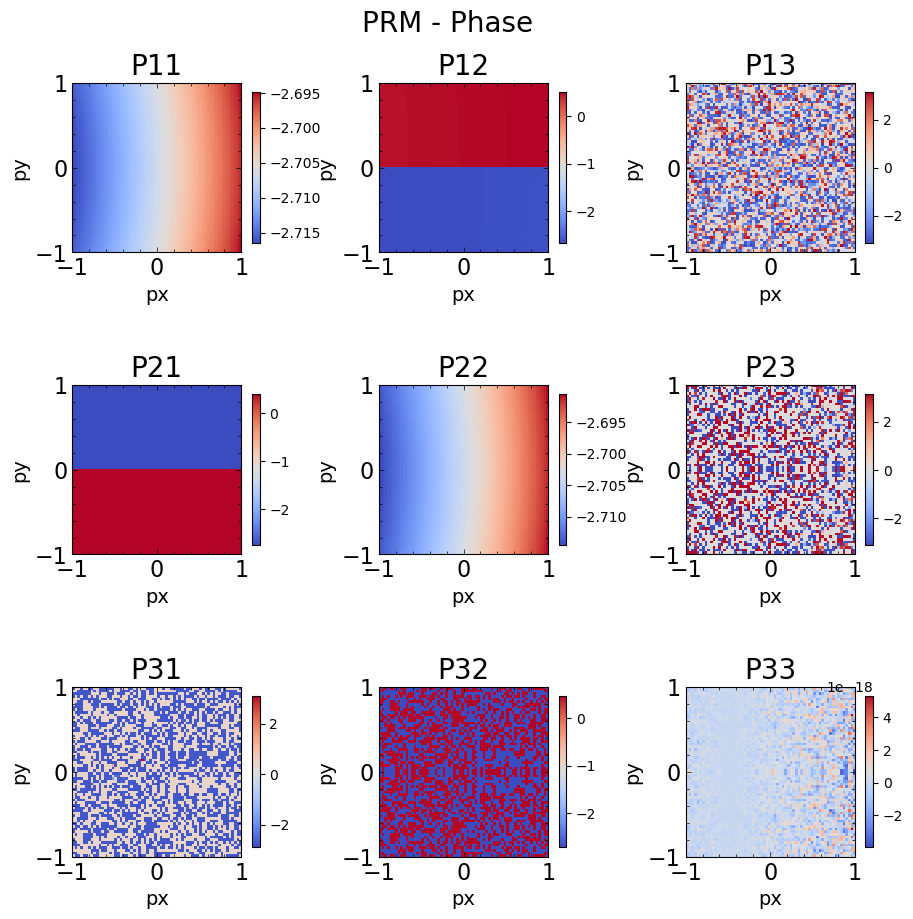

In [12]:
a_loc=np.array([0,0,1])
xin=np.array([0,1,0])
xout=np.array([0,1,0])

prt=pol.calc_prt(sur_list=oap2_raydata,n_rays=n_rays,a_loc=a_loc,xin=xin,xout=xout,n_layer=2,nb=nb1,nf=nf1,df=df1,wav=wav)
jones=pol.calc_jones(prt[2],prt[3],prt[4])
gen.plot_prm(jones,prt[1])
gen.save_jones(jones,prt[1],jones_pupils_dir,fil,'oap2')

DM

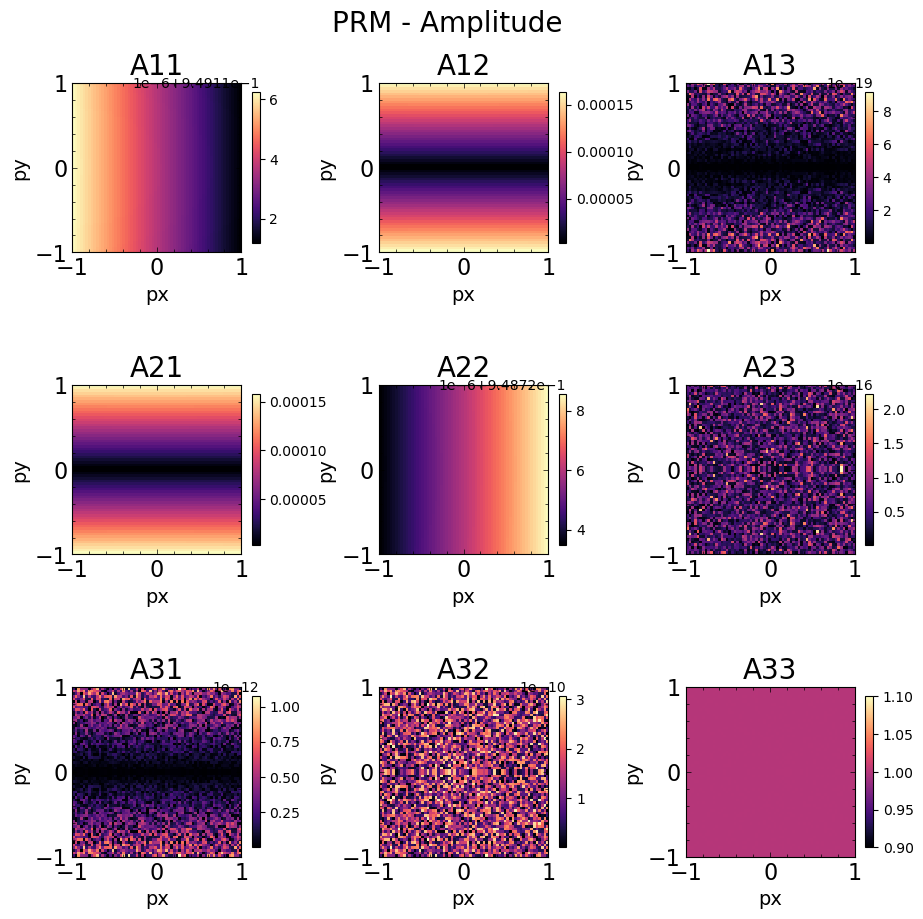

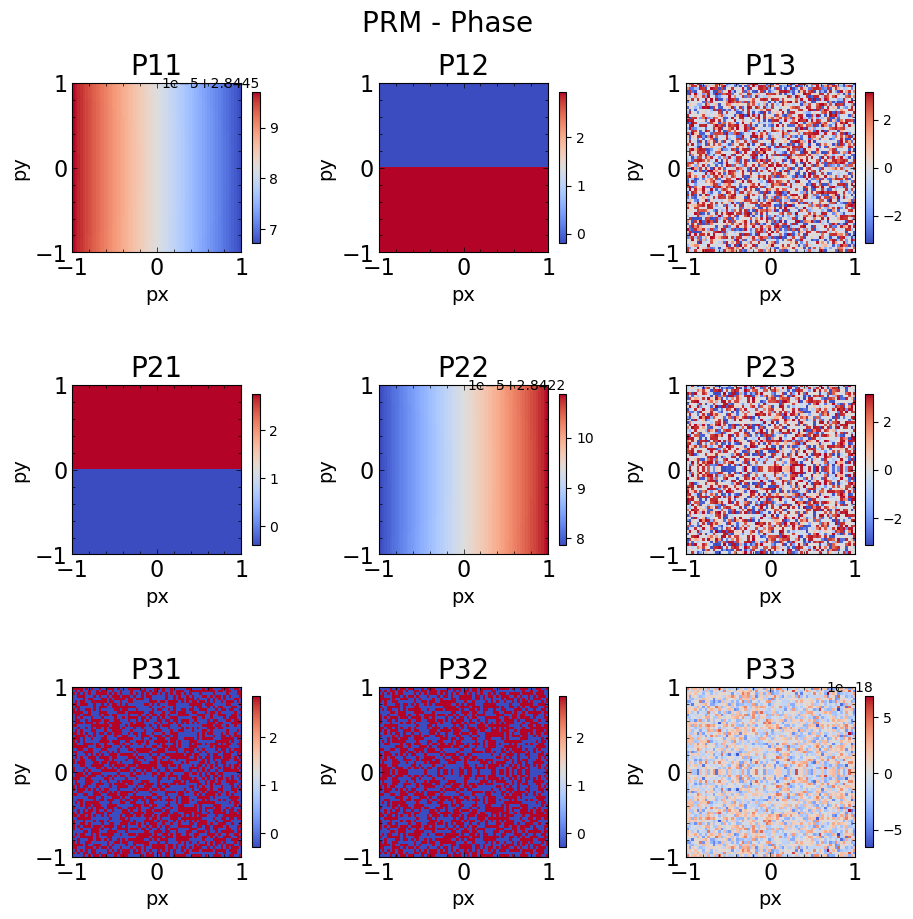

In [13]:
a_loc=np.array([0,0,1])
xin=np.array([0,1,0])
xout=np.array([0,1,0])

prt=pol.calc_prt(sur_list=dm_raydata,n_rays=n_rays,a_loc=a_loc,xin=xin,xout=xout,n_layer=1,nb=nb2,nf=None,df=None, wav=wav)
jones=pol.calc_jones(prt[2],prt[3],prt[4])
gen.plot_prm(jones,prt[1])
gen.save_jones(jones,prt[1],jones_pupils_dir,fil,'dm')

OAP3

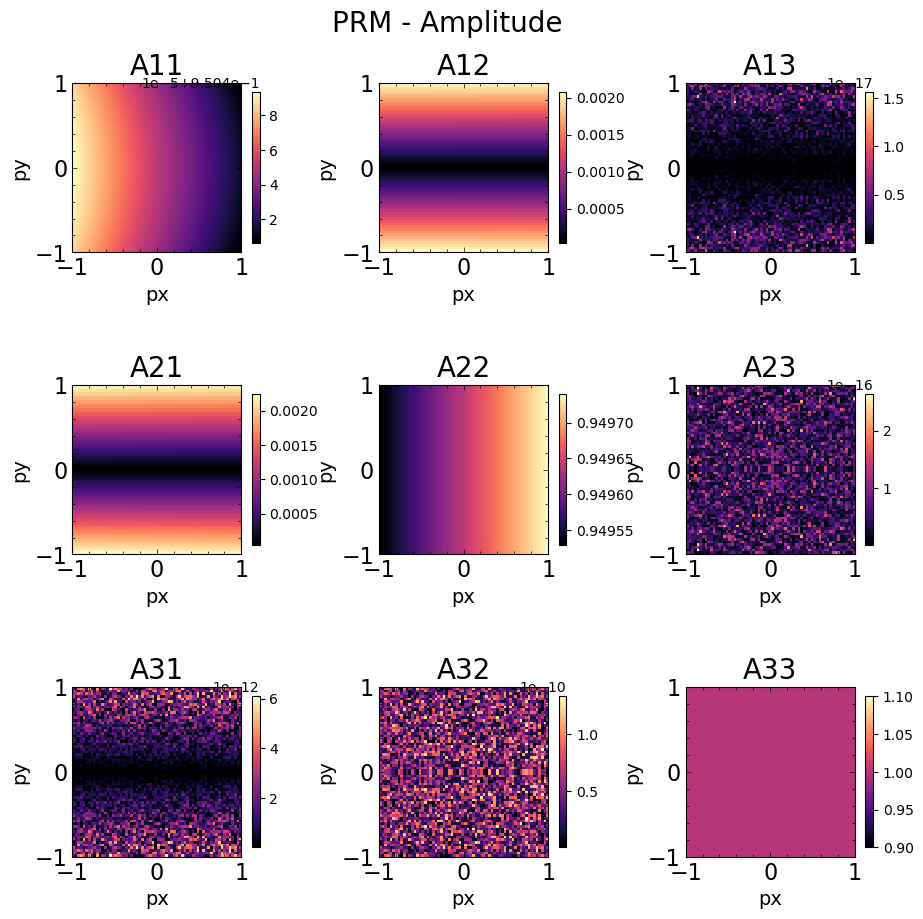

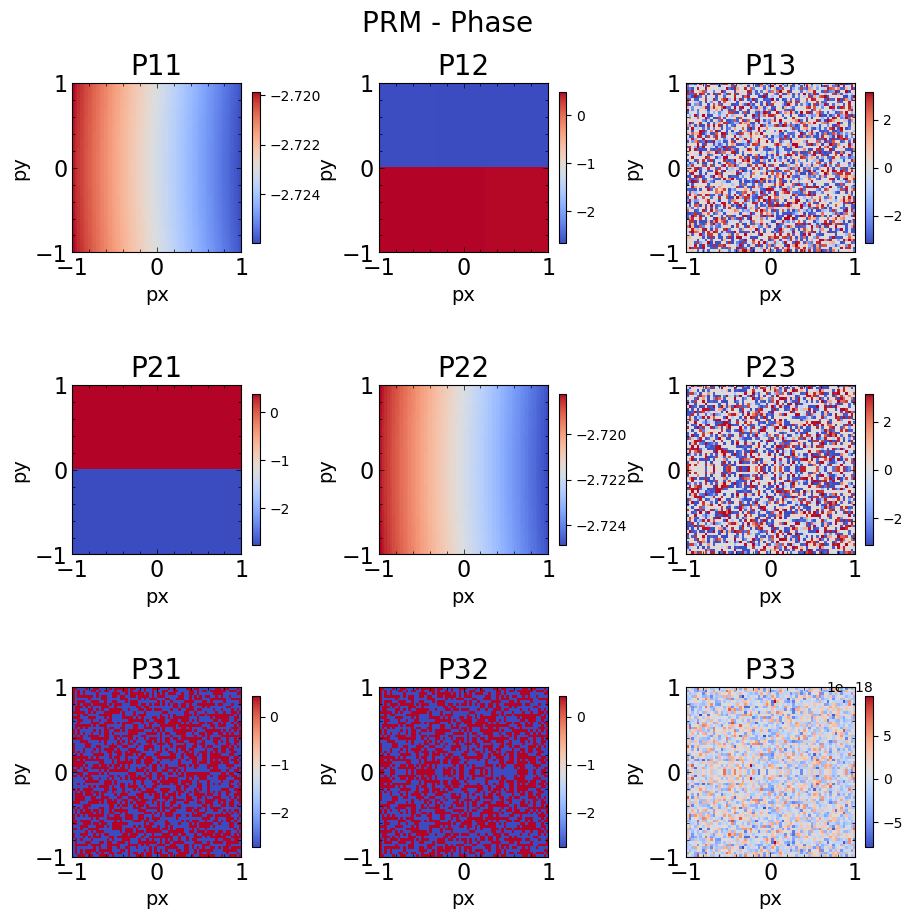

In [14]:
a_loc=np.array([0,0,1])
xin=np.array([0,1,0])
xout=np.array([0,1,0])

prt=pol.calc_prt(sur_list=oap3_raydata,n_rays=n_rays,a_loc=a_loc,xin=xin,xout=xout,n_layer=2,nb=nb1,nf=nf1,df=df1,wav=wav)
jones=pol.calc_jones(prt[2],prt[3],prt[4])
gen.plot_prm(jones,prt[1])
gen.save_jones(jones,prt[1],jones_pupils_dir,fil,'oap3')

Fold Flat 1

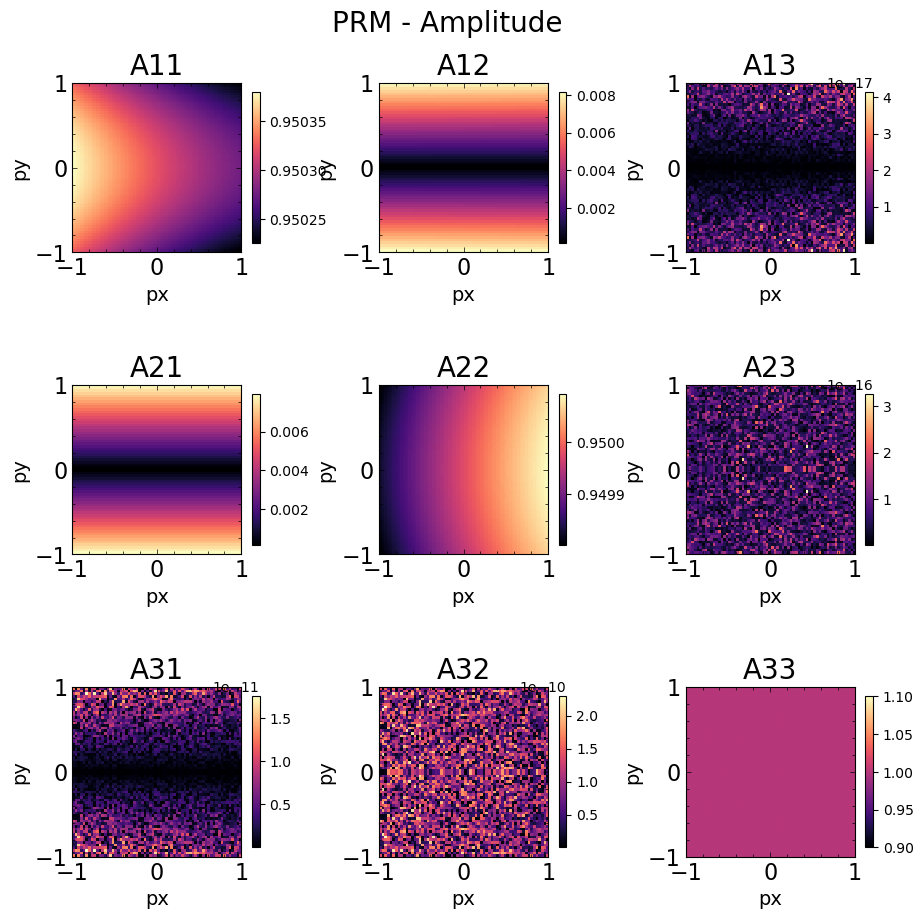

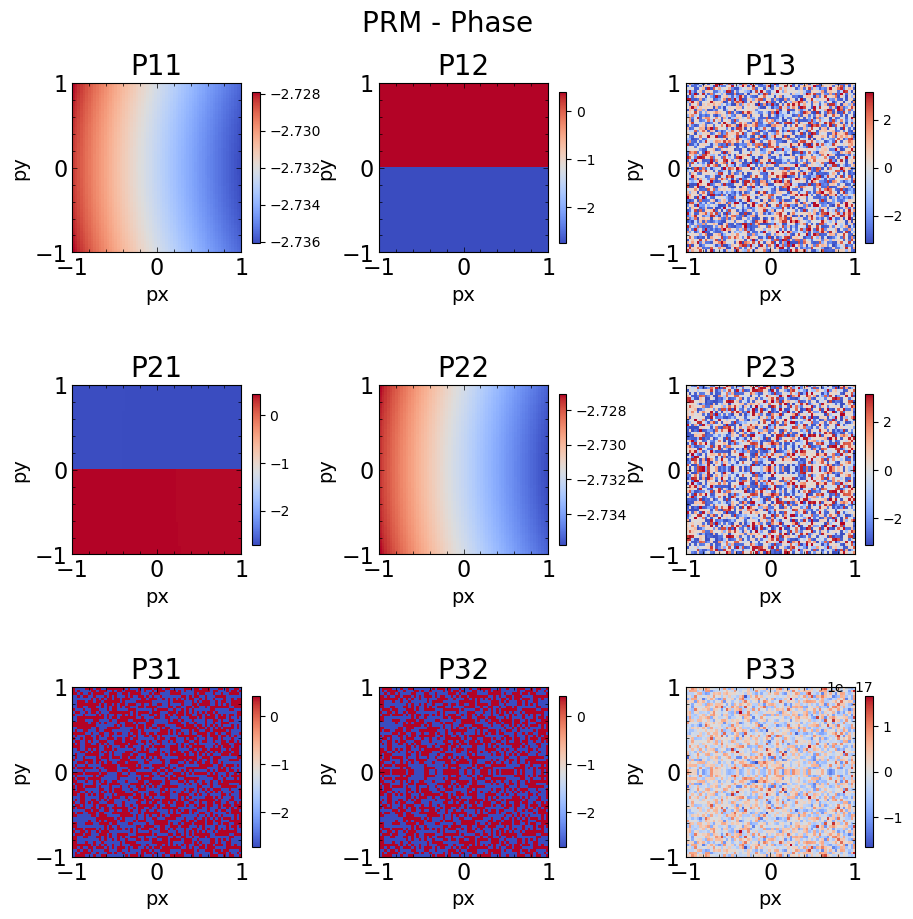

In [15]:
a_loc=np.array([0,0,1])
xin=np.array([0,1,0])
xout=np.array([0,1,0])

prt=pol.calc_prt(sur_list=ff1_raydata,n_rays=n_rays,a_loc=a_loc,xin=xin,xout=xout,n_layer=2,nb=nb1,nf=nf1,df=df1,wav=wav)
jones=pol.calc_jones(prt[2],prt[3],prt[4])
gen.plot_prm(jones,prt[1])
gen.save_jones(jones,prt[1],jones_pupils_dir,fil,'ff1')

OAP3S

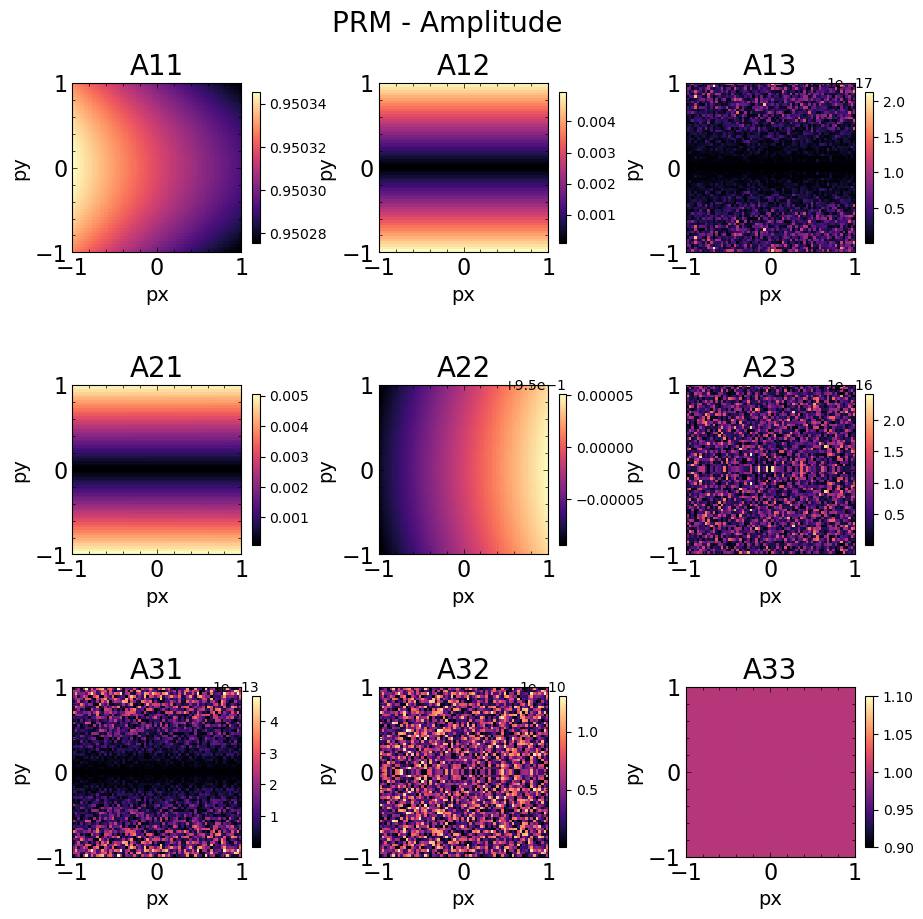

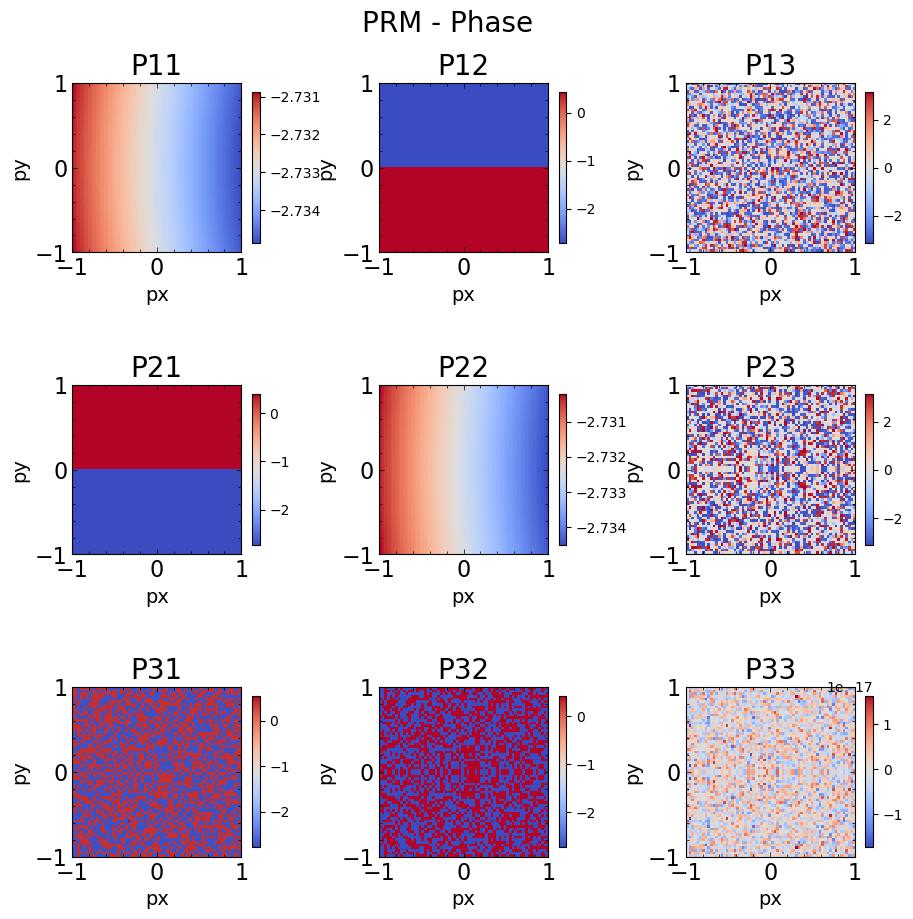

In [16]:
a_loc=np.array([0,0,1])
xin=np.array([0,1,0])
xout=np.array([0,1,0])

prt=pol.calc_prt(sur_list=oap3s_raydata,n_rays=n_rays,a_loc=a_loc,xin=xin,xout=xout,n_layer=2,nb=nb1,nf=nf1,df=df1,wav=wav)
jones=pol.calc_jones(prt[2],prt[3],prt[4])
gen.plot_prm(jones,prt[1])
gen.save_jones(jones,prt[1],jones_pupils_dir,fil,'oap3s')

Fold Flat 2

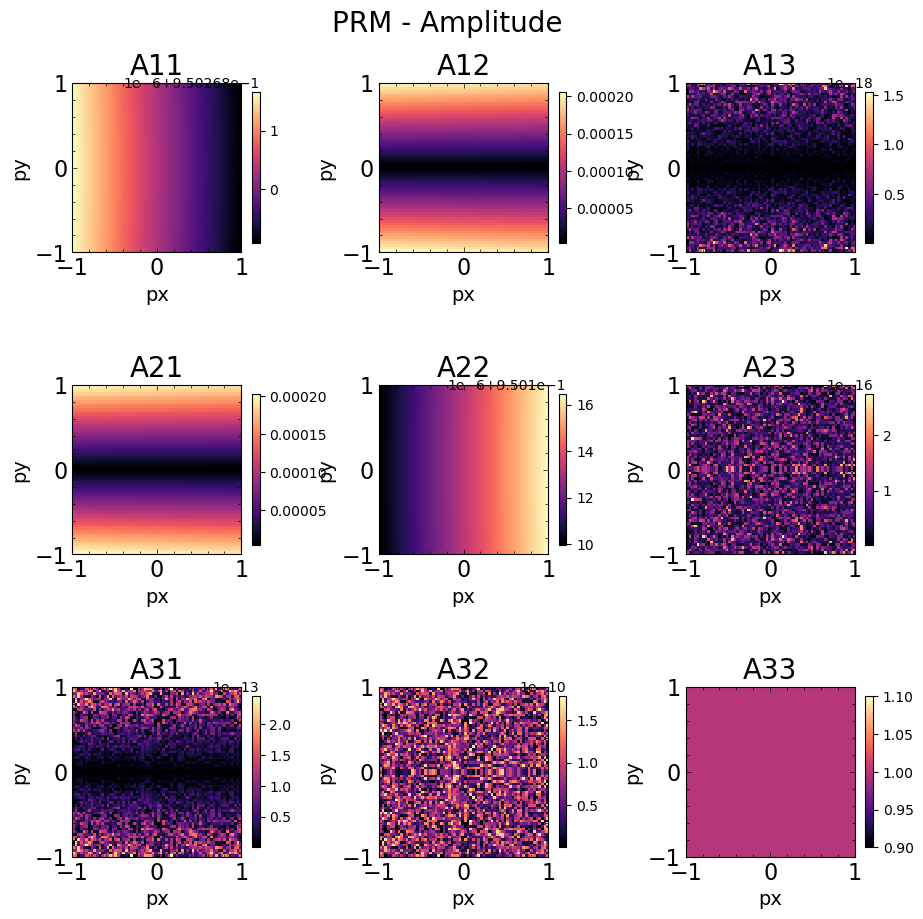

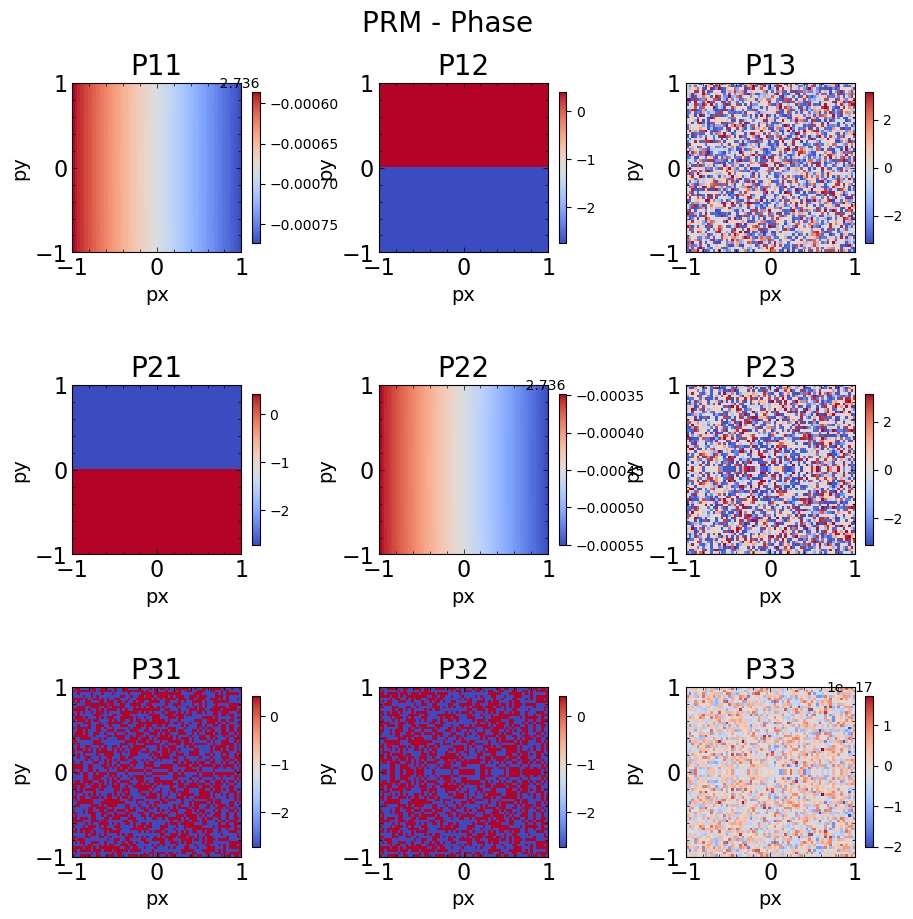

In [19]:
a_loc=np.array([0,0,1])
xin=np.array([0,1,0])
xout=np.array([0,1,0])

prt=pol.calc_prt(sur_list=ff2_raydata,n_rays=n_rays,a_loc=a_loc,xin=xin,xout=xout,n_layer=2,nb=nb1,nf=nf1,df=df1,wav=wav)
jones=pol.calc_jones(prt[2],prt[3],prt[4])
gen.plot_prm(jones,prt[1])
gen.save_jones(jones,prt[1],jones_pupils_dir,fil,'ff2')

OAP2S

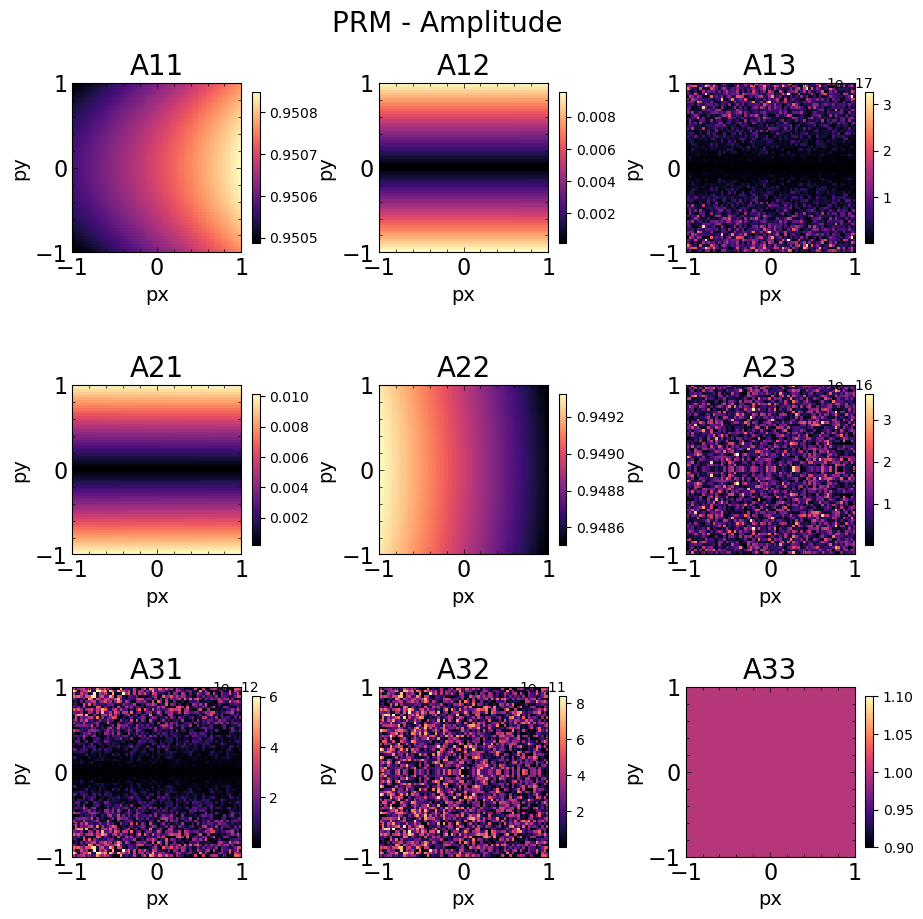

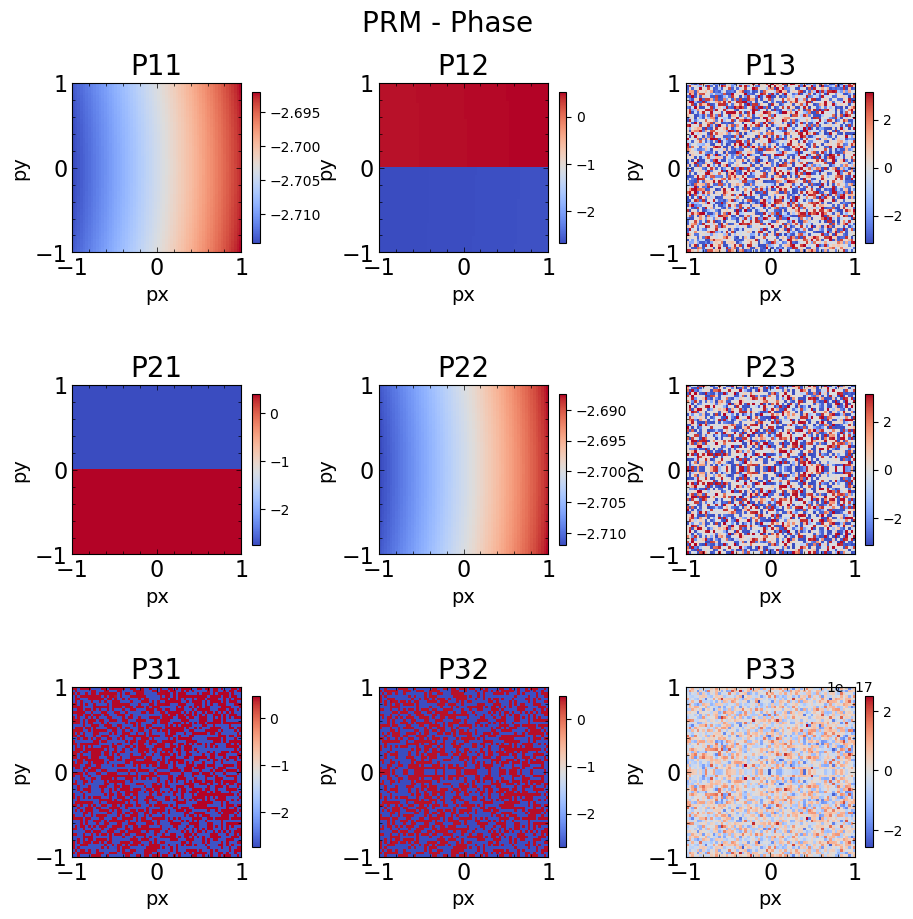

In [21]:
a_loc=np.array([0,0,1])
xin=np.array([0,1,0])
xout=np.array([0,1,0])

prt=pol.calc_prt(sur_list=oap2s_raydata,n_rays=n_rays,a_loc=a_loc,xin=xin,xout=xout,n_layer=2,nb=nb1,nf=nf1,df=df1,wav=wav)
jones=pol.calc_jones(prt[2],prt[3],prt[4])
gen.plot_prm(jones,prt[1])
gen.save_jones(jones,prt[1],jones_pupils_dir,fil,'oap2s')

OAP1S

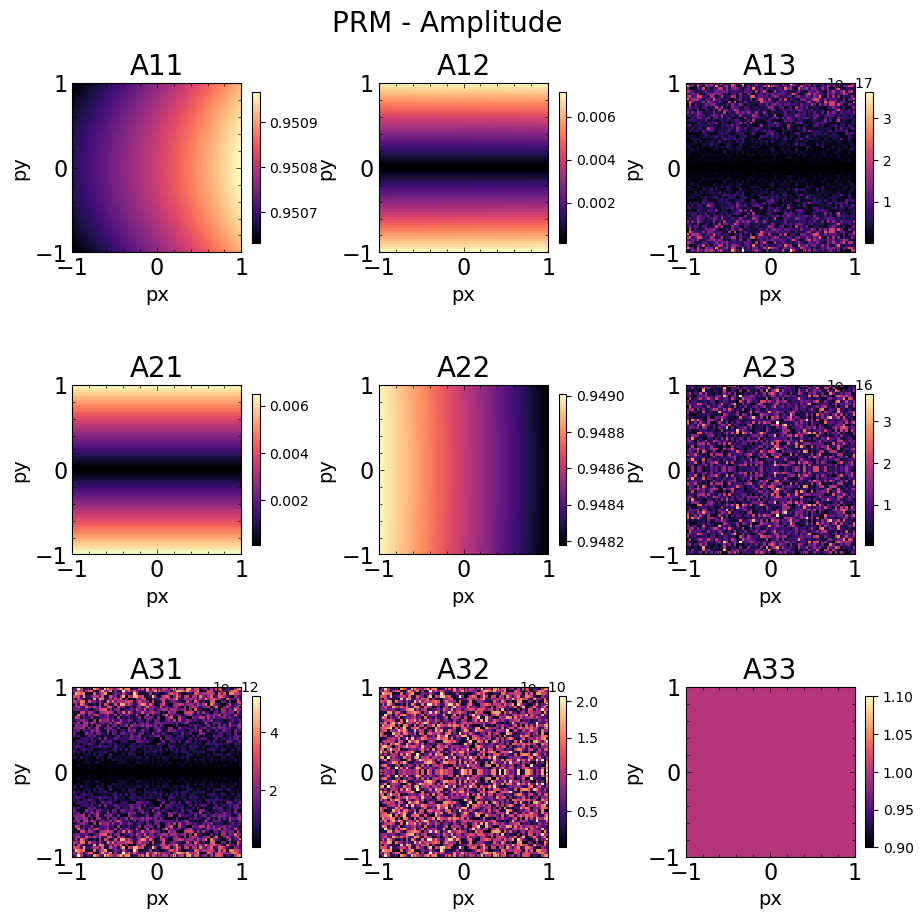

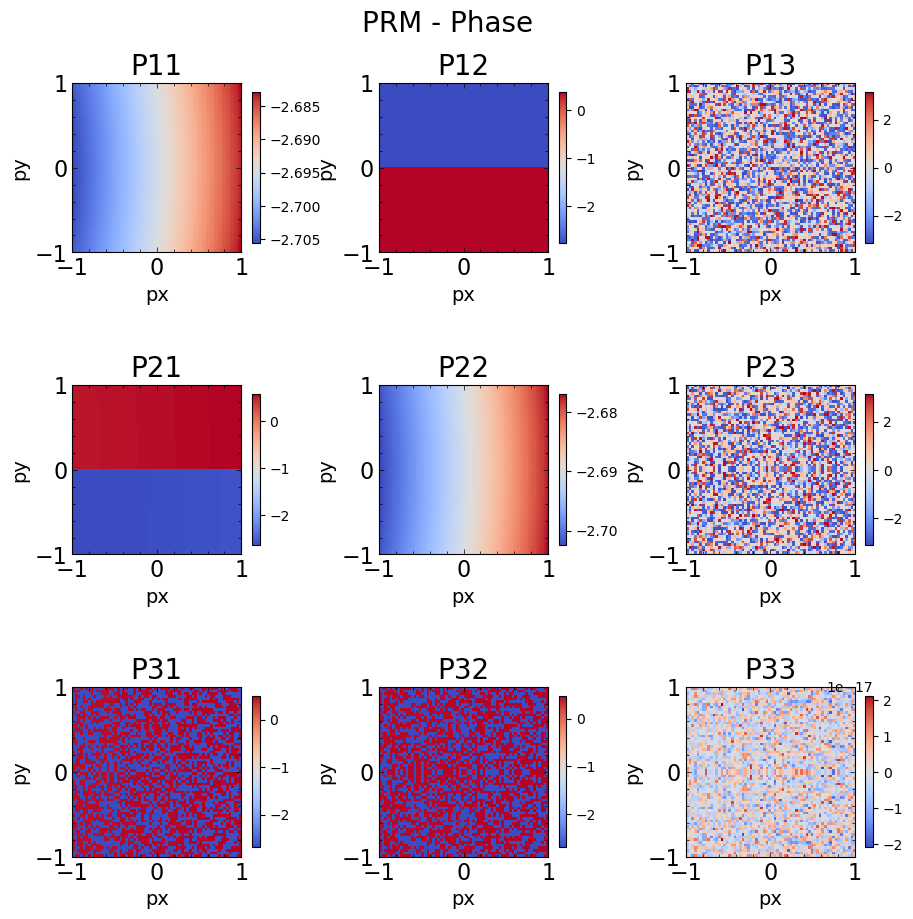

In [23]:
a_loc=np.array([0,0,1])
xin=np.array([0,1,0])
xout=np.array([0,1,0])

prt=pol.calc_prt(sur_list=oap1s_raydata,n_rays=n_rays,a_loc=a_loc,xin=xin,xout=xout,n_layer=2,nb=nb1,nf=nf1,df=df1,wav=wav)
jones=pol.calc_jones(prt[2],prt[3],prt[4])
gen.plot_prm(jones,prt[1])
gen.save_jones(jones,prt[1],jones_pupils_dir,fil,'oap1s')

Final fold

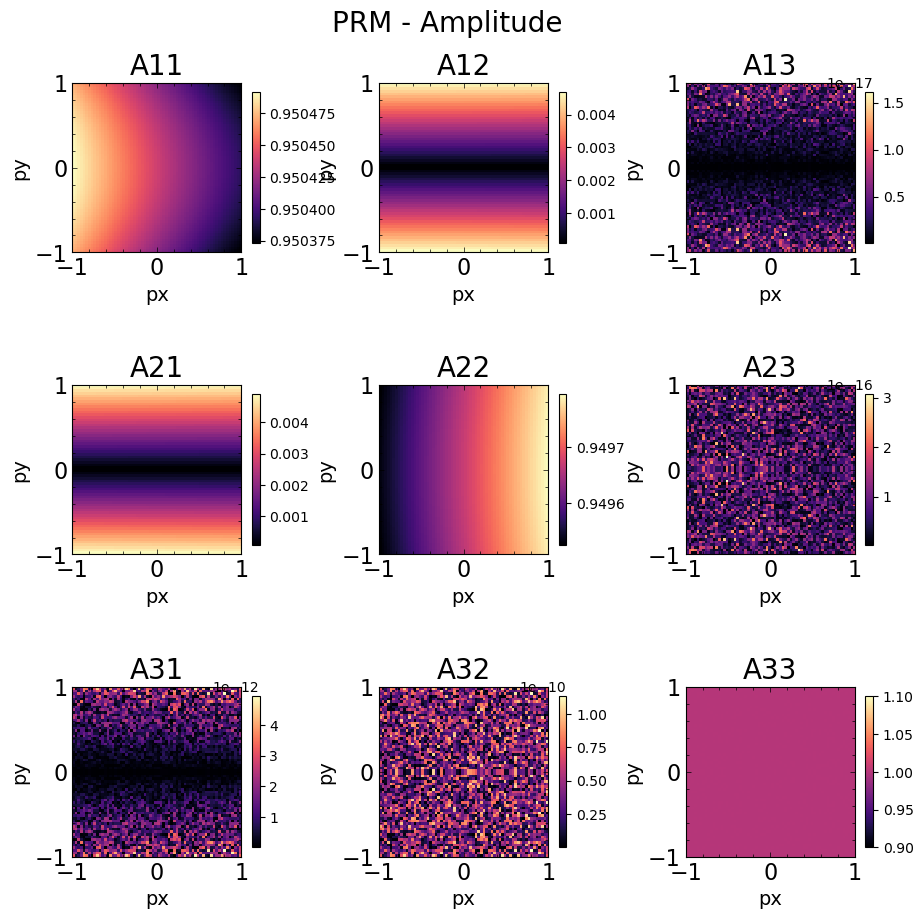

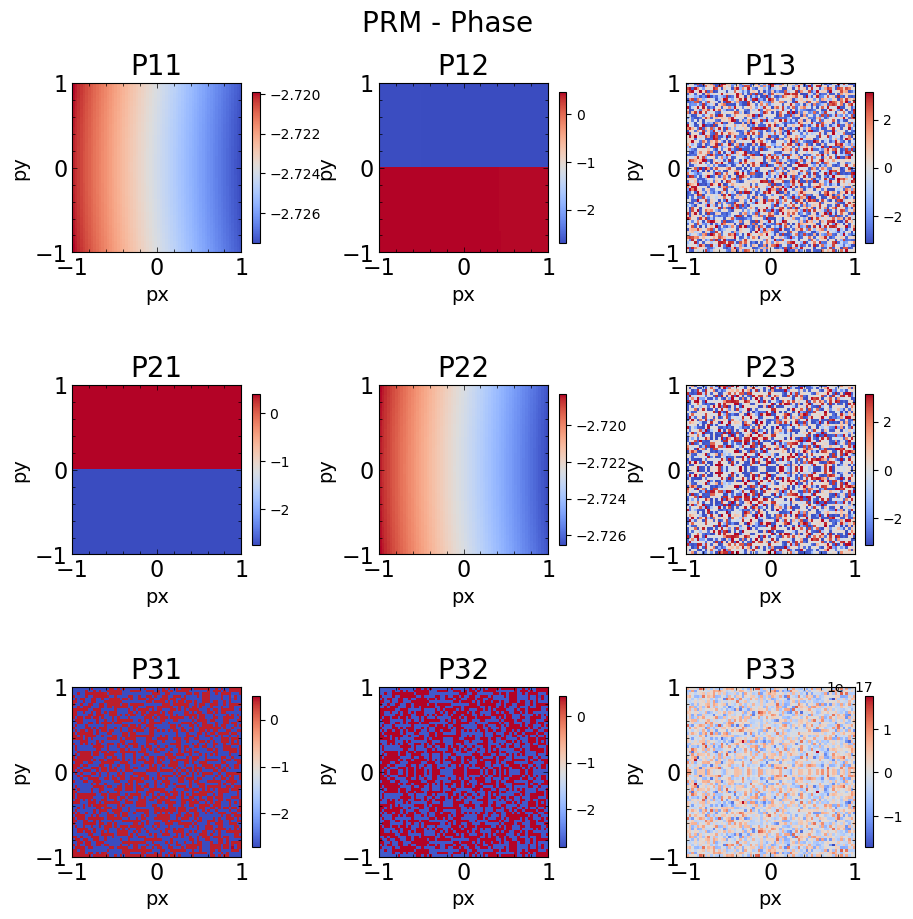

In [24]:
a_loc=np.array([0,0,1])
xin=np.array([0,1,0])
xout=np.array([0,1,0])


prt=pol.calc_prt(sur_list=ff0_raydata,n_rays=n_rays,a_loc=a_loc,xin=xin,xout=xout,n_layer=2,nb=nb1,nf=nf1,df=df1,wav=wav)
jones=pol.calc_jones(prt[2],prt[3],prt[4])
gen.plot_prm(jones,prt[1])
gen.save_jones(jones,prt[1],jones_pupils_dir,fil,'ff0')